In [1]:
import os
seed = 10
os.environ['PYTHONHASHSEED']=str(seed)

In [2]:
import requests
import lxml
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.utils import compute_class_weight
import tensorflow as tf
from pil import Image
from sklearn import preprocessing
import tensorflow_addons as tfa

count = 0

In [3]:
seed = 10
df = pd.read_csv("data/cyclic_tickers/initial_indicators/HMC_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,17.562500,18.182877,-82.786885,-348800.0,2.0
2000-01-24,17.875000,18.135511,-64.957265,-264800.0,2.0
2000-01-25,17.546875,18.044952,-82.905983,-350800.0,2.0
2000-01-26,17.328125,17.934671,-94.871795,-460000.0,2.0
2000-01-27,17.250000,17.829337,-93.548387,-540800.0,2.0


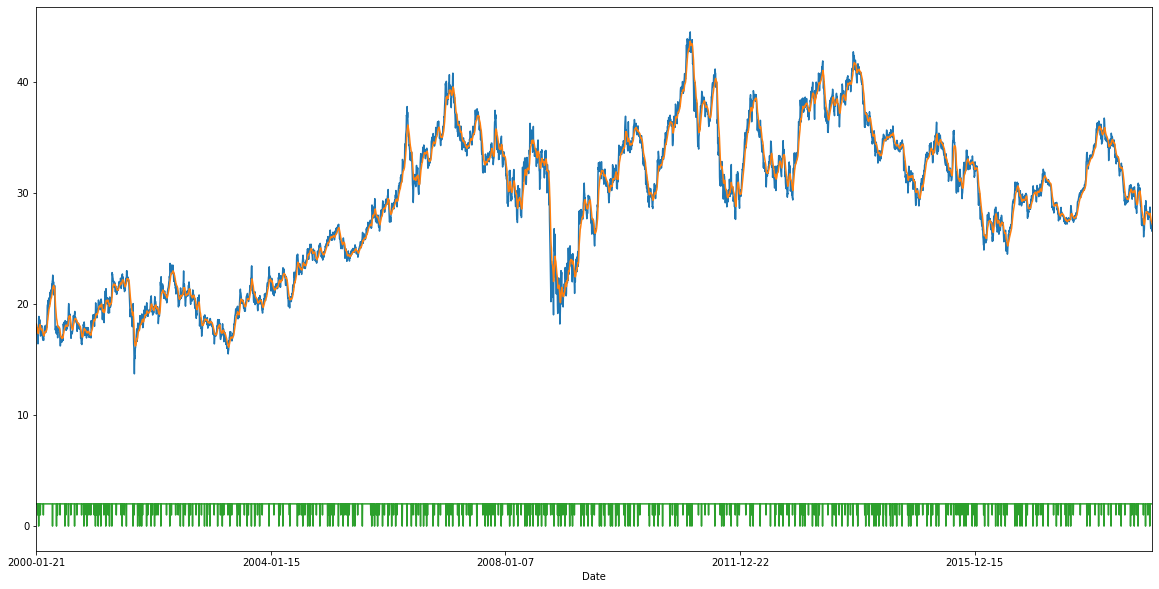

In [4]:
#%matplotlib notebook
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [5]:
df.to_csv('full cycle data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [6]:
acc_df = df
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4759 entries, 2000-01-21 to 2018-12-19
Data columns (total 5 columns):
previous_1d    4759 non-null float64
EMA_12         4759 non-null float64
willr_14       4759 non-null float64
OBV_7          4759 non-null float64
labels         4759 non-null float64
dtypes: float64(5)
memory usage: 223.1+ KB


## Test Set

In [10]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/F_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,28.696527,28.933312,-60.897434,-10551829.0,2.0
2000-01-24,27.717651,28.746288,-97.435894,-19556923.0,2.0
2000-01-25,28.095465,28.646161,-83.333274,-11634726.0,2.0
2000-01-26,27.545919,28.476893,-83.505131,-18162314.0,1.0
2000-01-27,26.378138,28.154008,-91.269808,-32689253.0,2.0


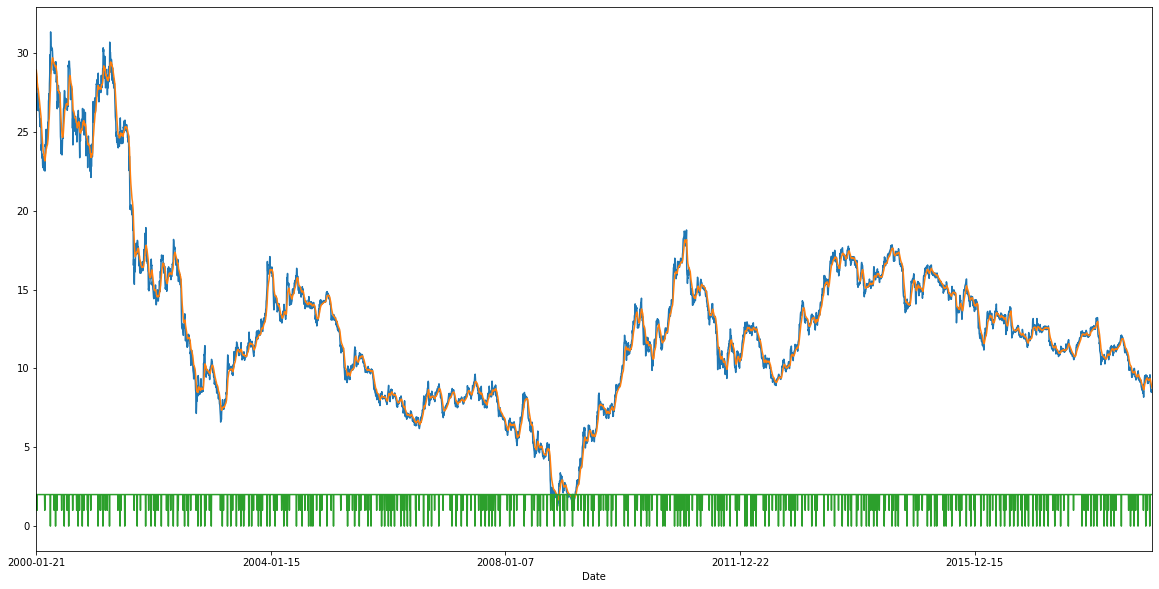

In [11]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

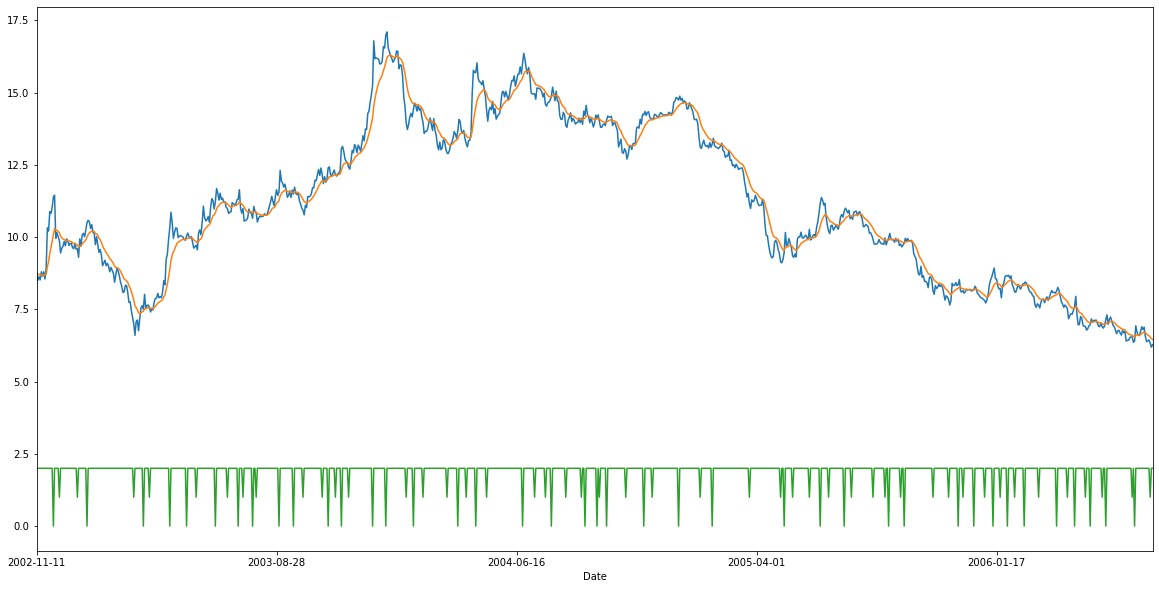

In [12]:
df = df.loc['2002-11-11':'2006-07-24']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [13]:
df.to_csv('full cycle data/test_acc_data.csv')